Aleksei Zhuravlev 50104961
Artem Otelepko



# Exercise 1

In [2]:
import pandas as pd
import numpy as np

df_nuclear = pd.read_excel('Data_Cortex_Nuclear.xls')
df_nuclear.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [4]:
df_sub = df_nuclear.loc[df_nuclear['class'].isin(['t-CS-s', 'c-CS-s'])]

print(df_sub['MouseID'].unique().size, 'mice were measured for each class')
print(df_sub.loc[df_sub['class'] == 't-CS-s']['MouseID'].unique().size, 'mice were measured for class t-CS-s')
print(df_sub.loc[df_sub['class'] == 'c-CS-s']['MouseID'].unique().size, 'mice were measured for class c-CS-s')

240 mice were measured for each class
105 mice were measured for class t-CS-s
135 mice were measured for class c-CS-s


In [12]:
import plotly.express as px
import plotly.graph_objects as go

df_sub = df_sub[['MouseID', 'class', 'pPKCG_N', 'pP70S6_N', 'pS6_N', 'pGSK3B_N', 'ARC_N']]
df_sub['color_class'] = df_sub['class'].apply(lambda x: 1 if x == 't-CS-s' else 0)

fig = go.Figure(data=
    go.Parcoords(
        line = dict( color = df_sub['color_class'],
                    colorscale = [[0, 'blue'], [1, 'red']]),
        dimensions = list([
            dict(label = 'pPKCG_N', values = df_sub['pPKCG_N']),
            dict(label = 'pP70S6_N', values = df_sub['pP70S6_N']),
            dict(label = 'pS6_N', values = df_sub['pS6_N']),
            dict(label = 'pGSK3B_N', values = df_sub['pGSK3B_N']),
            dict(label = 'ARC_N', values = df_sub['ARC_N'])
        ])
    )
)
# add title
fig.update_layout(title_text='Parallel Coordinates Plot')
fig.show()

I don't see anything suspicious...

# Exercise 2




In [28]:
# Read the breast-cancer-wisconsin.xlsx file
df_cancer = pd.read_excel('breast-cancer-wisconsin.xlsx')
df_cancer.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [29]:
# count missing values in each column
df_cancer.isna().sum()

code            0
thickness       0
uniCelS         0
uniCelShape     0
marAdh          0
epiCelSize      0
bareNuc        16
blaChroma       0
normNuc         0
mitoses         0
class           0
dtype: int64

There are 16 missing values in the BARE_NUCLEI column. We can simply drop them to avoid corrupting the data by e.g., setting it to mean of the column.

In [30]:
# drop rows with missing values
df_cancer = df_cancer.dropna()

cumulative variance: [0.65549993 0.74171625 0.80163316 0.85270288 0.89495575 0.92849758
 0.96120899 0.99017964 1.        ]


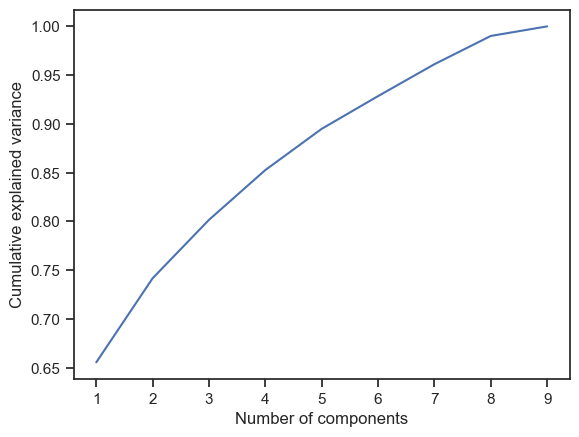

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# drop the class and code columns
df_cancer_clean = df_cancer.drop(columns=['class', 'code'])

# scale the data
scaler = StandardScaler()
df_cancer_scaled = scaler.fit_transform(df_cancer_clean)

variance_list = []
# create PCA object
pca = PCA()

# fit the data
pca.fit(df_cancer_scaled)

# calculate the cumulative sum of the explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

print('cumulative variance:', cumulative_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, )
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

We need 5 components to explain 90% of the variance


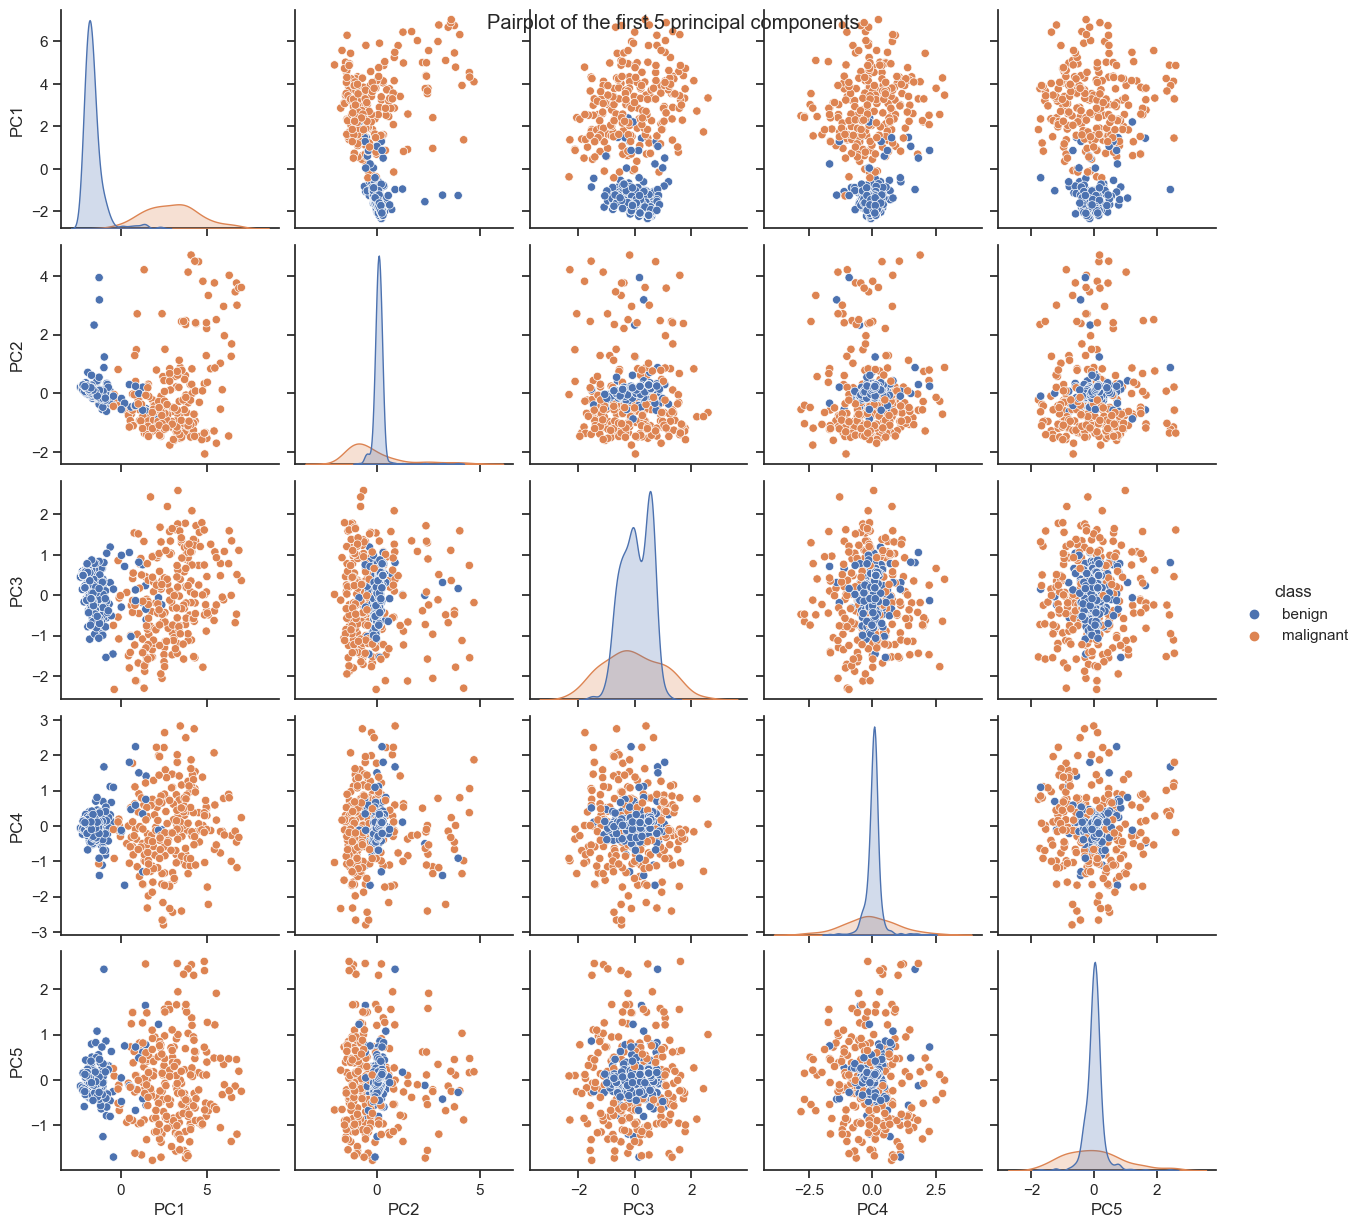

In [35]:
import seaborn as sns

# create PCA object
pca = PCA(n_components=5)

# fit the data
pca.fit(df_cancer_scaled)

# transform the data
df_cancer_pca = pca.transform(df_cancer_scaled)

# create a dataframe with the first 5 principal components
df_cancer_pca = pd.DataFrame(df_cancer_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# create a dataframe with the class column
df_cancer_class = df_cancer[['class']]
df_cancer_class = df_cancer_class.replace({2: 'benign', 4: 'malignant'})
df_cancer_class = df_cancer_class.reset_index(drop=True)

# merge the two dataframes
df_cancer_pca = pd.concat([df_cancer_pca, df_cancer_class], axis=1)

sns.set_theme(style="ticks")
sns.pairplot(df_cancer_pca, hue="class")
plt.suptitle('Pairplot of the first 5 principal components')
plt.show()

PC1 shows a clear separation between the two classes. PC2 and PC3 also show some separation, but not as clear as PC1. PC4 and PC5 don't show any separation between the two classes.

In [43]:
# create a dataframe with the original variables and their weights
df_cancer_weights = pd.DataFrame(pca.components_, columns=df_cancer_clean.columns)
df_cancer_weights = df_cancer_weights.T

# get the highest and lowest weights
df_cancer_weights['highest'] = df_cancer_weights.idxmax(axis=1)
df_cancer_weights['lowest'] = df_cancer_weights.idxmin(axis=1)

df_cancer_weights

,0,1,2,3,4,5,6,7,8,highest,lowest
thickness,0.302063,-0.140801,-0.866372,-0.107828,-0.080321,0.242518,0.008516,0.247707,0.002747,0,2
uniCelS,0.380793,-0.046640,0.019938,0.204255,0.145653,0.139032,0.205434,-0.436300,0.733211,8,7
uniCelShape,0.377583,-0.082422,-0.033511,0.175866,0.108392,0.074527,0.127209,-0.582727,-0.667481,0,8
marAdh,0.332724,-0.052094,0.412647,-0.493173,0.019569,0.654629,-0.123830,0.163434,-0.046019,5,3
epiCelSize,0.336234,0.164404,0.087743,0.427384,0.636693,-0.069309,-0.211018,0.458669,-0.066891,4,6
bareNuc,0.335068,-0.261261,-0.000691,-0.498618,0.124773,-0.609221,-0.402790,-0.126653,0.076510,0,5
blaChroma,0.345747,-0.228077,0.213072,-0.013047,-0.227666,-0.298897,0.700417,0.383719,-0.062241,6,5
normNuc,0.335591,0.033966,0.134248,0.417113,-0.690210,-0.021518,-0.459783,0.074012,0.022079,3,4
mitoses,0.230206,0.905557,-0.080492,-0.258988,-0.105042,-0.148345,0.132117,-0.053537,-0.007496,1,3


The original variables with the highest and lowest weights in the definition of the first principal component are: uniformity_of_cell_size and uniformity_of_cell_shape. The lowest weights is mitoses.

In [44]:
df_cancer_pca.head()

,PC1,PC2,PC3,PC4,PC5,class
0,-1.470171,-0.104273,-0.565685,-0.031959,-0.150998,benign
1,1.442046,-0.570141,0.236601,-0.478150,1.643085,benign
2,-1.592478,-0.076120,0.048858,-0.092388,-0.059739,benign
3,1.479812,-0.528452,-0.603048,1.410827,-0.560737,benign
4,-1.344862,-0.090719,0.029997,-0.338284,-0.108829,benign


There is an outlier with PC2 = 4 and PC1 = -1. Let us remove it and see if the separation between the two classes improves.

In [45]:
# remove the outlier
df_cancer_pca.loc[(df_cancer_pca['PC2'] > 3.9) & (df_cancer_pca['PC1'] < -0.9)]

,PC1,PC2,PC3,PC4,PC5,class
673,-1.250597,3.943012,0.164269,-0.915357,-0.275685,benign


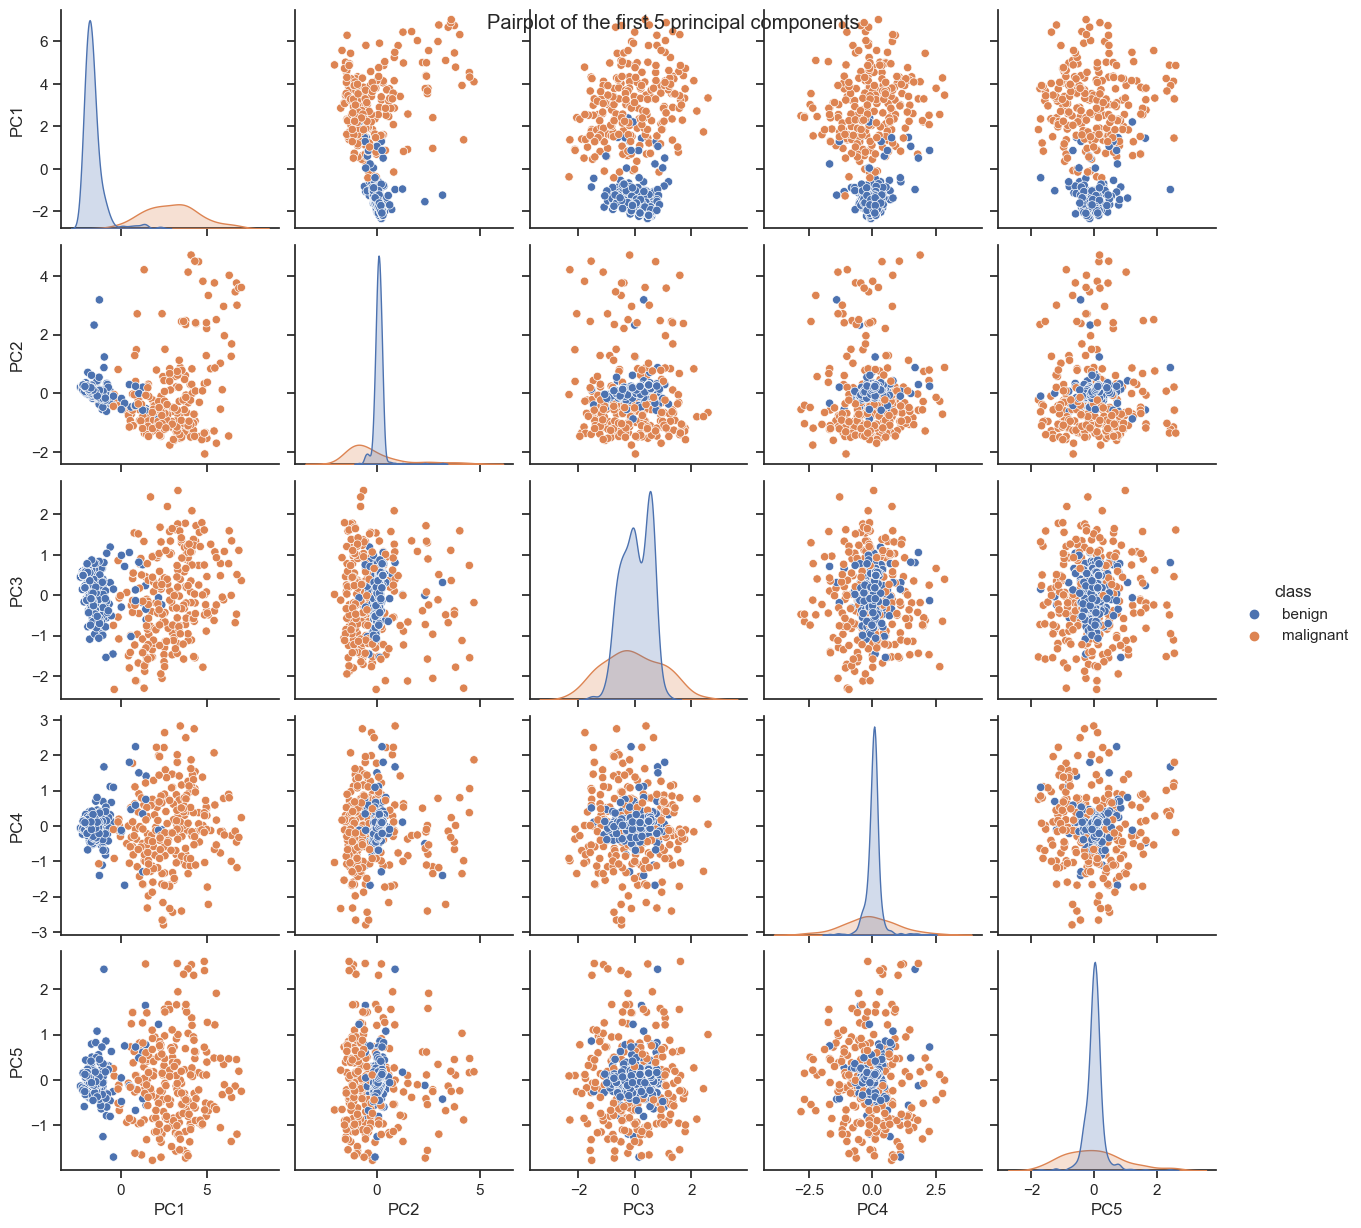

In [46]:
df_cancer_pca = df_cancer_pca.drop([673])

sns.set_theme(style="ticks")
sns.pairplot(df_cancer_pca, hue="class")
plt.suptitle('Pairplot of the first 5 principal components')
plt.show()

We are looking for the direction with the highest variance, and PCA is very sensitive to variables that have different ranges or to the presence of outliers. If there are large differences between the ranges of the original variables, the variables with large ranges will dominate those with small ranges.

To avoid this, I used StandardScaler to scale the data before applying PCA. This way, all the variables have the same range [0, 1] and the PCA will be more robust to outliers.